In [18]:
# -*- coding:utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
## 데이터 불러오기###########################################
KOSPI200_index=pd.read_csv('KOSPI200_index.csv').set_index('Date')
KOSPI200_close=pd.read_csv('KOSPI200_close.csv').set_index('Date')
KOSPI200_volume=pd.read_csv('KOSPI200_volume.csv').set_index('Date')
df_port_info=pd.read_csv('codenamelist.csv',encoding='cp949',dtype=str)
df_pf=pd.DataFrame()
del df_port_info['Unnamed: 0']
###########################################################
KOSPI200_close.head()

,005930,000660,005380,005490,051910,035420,207940,105560,028260,055550,...,192400,003920,027410,036580,004490,002960,008060,014830,097230,000050
Date,,,,,,,,,,,,,,,,,,,,,
2017.02.08,1920000,54600,139000,268000,270500,795000,163000,47250,127500,46050,...,133000,741000,92000,11600,35600,424000,8320,43100,2880,14100
2017.02.09,1920000,52700,140000,271500,272000,787000,161000,47600,126000,46650,...,133500,732000,91800,11750,35450,423000,8350,43600,2915,14050
2017.02.10,1918000,50000,141000,275500,281000,795000,158000,47800,127500,47500,...,135500,741000,98700,12100,35300,424500,8400,44050,2925,14200
2017.02.13,1898000,50700,139500,278500,279500,795000,158000,47950,125500,47100,...,134500,747000,99800,12100,35200,427000,8350,44600,2990,14400
2017.02.14,1879000,48450,140000,282500,277000,770000,156500,48000,126000,47250,...,138000,753000,100500,12150,35450,426500,8310,44200,2985,14450


In [3]:
## GLOBAL VARIABLE#########################################
target_n=240                  # 약 1년치 데이터(한달:20일로 가정)
initial_balance=100000000     # 초기 잔고 1억
balance=initial_balance
rperiod=20                    # rebalancing period
nperiod=int(120/rperiod)      # rebalncing 횟수
residual=0                    # 잔여 현금
balanceMat=np.zeros(target_n) # 포트폴리오의 가치 시계열
###########################################################

In [4]:
temp_df=KOSPI200_close.copy()
temp_diff=temp_df/temp_df.shift(1)
df_port_info['avgdaily']=[(x-1)*100 for x in temp_diff.iloc[1:120].mean().tolist()]
df_port_info['stddaily']=[x*100 for x in temp_diff.iloc[1:120].std().tolist()]
df_port_info

,Code,Name,avgdaily,stddaily
0,005930,삼성전자,0.213417,1.299595
1,000660,SK하이닉스,0.207776,2.155645
2,005380,현대차,0.069978,2.022623
3,005490,POSCO,0.188752,1.665926
4,051910,LG화학,0.188913,1.610227
5,035420,NAVER,0.019544,1.991195
6,207940,삼성바이오로직스,0.482286,2.473670
7,105560,KB금융,0.185801,1.457887
8,028260,삼성물산,0.098044,1.820382
9,055550,신한지주,0.131515,1.191047


Text(0,0.5,'E(R)')

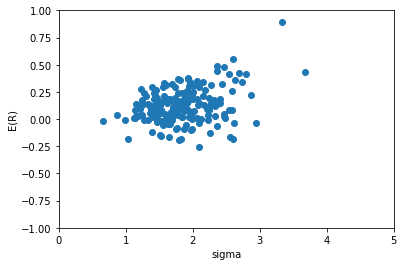

In [19]:
plt.scatter(df_port_info.iloc[:,3],df_port_info.iloc[:,2])
plt.axis([0,5,-1,1])
plt.xlabel('sigma')
plt.ylabel('E(R)')


In [6]:
df_sort=df_port_info.sort_values(by=['avgdaily'],ascending=False)
df_sort

,Code,Name,avgdaily,stddaily
116,020150,일진머티리얼즈,0.893738,3.339015
99,010620,현대미포조선,0.555474,2.595585
37,009150,삼성전기,0.488208,2.362979
6,207940,삼성바이오로직스,0.482286,2.473670
137,003300,한일시멘트,0.446180,2.355011
113,003520,영진약품,0.437007,3.675680
192,097230,한진중공업,0.423257,2.696311
151,093370,후성,0.415346,2.541294
83,011070,LG이노텍,0.415017,2.798955
92,047040,대우건설,0.373758,1.935865


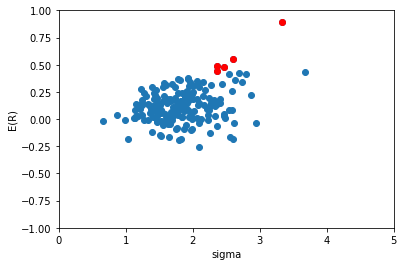

In [20]:
plt.scatter(df_port_info.iloc[:,3],df_port_info.iloc[:,2])
plt.axis([0,5,-1,1])
plt.xlabel('sigma')
plt.ylabel('E(R)')

for i in range(5):
    plt.scatter(df_sort.iloc[i,3],df_sort.iloc[i,2],color='r')


In [8]:
port_list=df_sort['Code'].iloc[:5].tolist()
port_list
covMat=temp_diff.iloc[1:120].cov().loc[port_list,port_list]*10000 #10000은 퍼센트 환산 위해 곱함
covMat

,020150,010620,009150,207940,003300
020150,11.149022,-0.624331,2.499818,1.747172,2.097150
010620,-0.624331,6.737064,-0.320539,0.073624,1.161660
009150,2.499818,-0.320539,5.583672,1.589389,0.406380
207940,1.747172,0.073624,1.589389,6.119044,1.065948
003300,2.097150,1.161660,0.406380,1.065948,5.546075


In [11]:
plot_list=[0,1]

In [12]:
ratio1=((df_sort['stddaily'].iloc[plot_list[1]])**2
        -covMat.iloc[plot_list[0],plot_list[1]])/((df_sort['stddaily'].iloc[plot_list[0]])**2
        +(df_sort['stddaily'].iloc[plot_list[1]])**2
          -2*covMat.iloc[plot_list[0],plot_list[1]])
ratio2=1-ratio1

print(ratio1,ratio2)

0.38471344482 0.61528655518


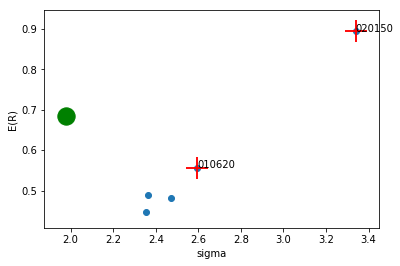

In [21]:
plt.scatter(df_sort['stddaily'].iloc[:5],df_sort['avgdaily'].iloc[:5])
plt.xlabel('sigma')
plt.ylabel('E(R)')

plot_list=[0,1]
plt.scatter(df_sort['stddaily'].iloc[plot_list],df_sort['avgdaily'].iloc[plot_list],color='r',marker='+',s=500)
plt.scatter(df_sort['stddaily'].iloc[plot_list],df_sort['avgdaily'].iloc[plot_list],color='r',marker='+',s=500)
for i in plot_list:
    plt.text(df_sort.iloc[i,3],df_sort.iloc[i,2],str(df_sort.iloc[i,0]))

pf_ret=ratio1*df_sort['avgdaily'].iloc[0]+(1-ratio1)*df_sort['avgdaily'].iloc[1]
pf_std=np.sqrt((ratio1*df_sort['stddaily'].iloc[0])**2+((1-ratio1)*df_sort['stddaily'].iloc[1])**2
               +2*ratio1*(1-ratio1)*covMat.iloc[0,1])
plt.scatter(pf_std,pf_ret,color='g',s=300)


In [15]:
pf_ratio=np.random.uniform(0,1,30)
pf_ratio

array([ 0.42868752,  0.0426805 ,  0.37187074,  0.34301553,  0.71471682,
        0.39715518,  0.98608105,  0.16226381,  0.91479838,  0.88846374,
        0.13542311,  0.0391266 ,  0.13339427,  0.35217896,  0.50676592,
        0.82941122,  0.85215795,  0.95787736,  0.56654142,  0.84457436,
        0.79503483,  0.2472669 ,  0.25777016,  0.04048105,  0.03681327,
        0.11471874,  0.80335635,  0.62966889,  0.31122122,  0.24223871])

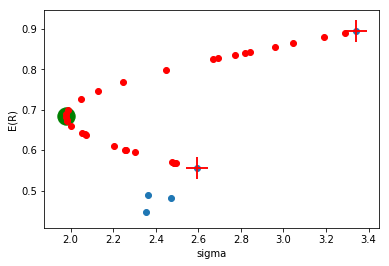

In [22]:
plt.scatter(df_sort['stddaily'].iloc[:5],df_sort['avgdaily'].iloc[:5])
plt.xlabel('sigma')
plt.ylabel('E(R)')

plot_list=[0,1]
plt.scatter(df_sort['stddaily'].iloc[plot_list],df_sort['avgdaily'].iloc[plot_list],color='r',marker='+',s=500)
plt.scatter(df_sort['stddaily'].iloc[plot_list],df_sort['avgdaily'].iloc[plot_list],color='r',marker='+',s=500)

pf_ret=ratio1*df_sort['avgdaily'].iloc[0]+(1-ratio1)*df_sort['avgdaily'].iloc[1]
pf_std=np.sqrt((ratio1*df_sort['stddaily'].iloc[0])**2+((1-ratio1)*df_sort['stddaily'].iloc[1])**2
               +2*ratio1*(1-ratio1)*covMat.iloc[0,1])
plt.scatter(pf_std,pf_ret,color='g',s=300)

for i in range(30):
    pf_ret=pf_ratio[i]*df_sort['avgdaily'].iloc[0]+(1-pf_ratio[i])*df_sort['avgdaily'].iloc[1]
    pf_std=np.sqrt((pf_ratio[i]*df_sort['stddaily'].iloc[0])**2
                   +((1-pf_ratio[i])*df_sort['stddaily'].iloc[1])**2+2*pf_ratio[i]*(1-pf_ratio[i])*covMat.iloc[0,1])
    plt.scatter(pf_std,pf_ret,color='r')


In [25]:
port_list=np.zeros((25,2),dtype=int)

result_list=np.zeros((250+300,2))
c=0

for i in [0,1,2,3,4]:
    for j in [0,1,2,3,4]:
        port_list[i*5+j,0]=i
        port_list[i*5+j,1]=j

for k in range(25):
    aa=np.random.uniform(0,1,[10,2])
    bb=np.sum(aa,axis=1)
    cc=np.zeros((10,2))
    for i in range(10):
        cc[i,:]=aa[i,:]/bb[i]
        result_list[c,0]=np.sqrt(np.sum(np.array(covMat.iloc[port_list[k],port_list[k]])*np.array(cc[i,:])
                                     *(np.array(cc[i,:]).reshape(-1,1))))
        result_list[c,1]=np.sum(np.array(df_sort['avgdaily'].iloc[port_list[k]])*cc[i,:])
        c+=1
        

nn=5
aa=np.random.uniform(0,1,[300,nn])
bb=np.sum(aa,axis=1)
cc=np.zeros((300,nn))

for i in range(300):
    cc[i,:]=aa[i,:]/bb[i]
    result_list[c,0]=np.sqrt(np.sum(np.array(covMat.iloc[:nn,:nn])*np.array(cc[i,:])
                                 *(np.array(cc[i,:]).reshape(-1,1))))
    result_list[c,1]=np.sum(np.array(df_sort['avgdaily'].iloc[:nn])*cc[i,:])
    c+=1
result_list

array([[ 3.33901515,  0.89373839],
       [ 3.33901515,  0.89373839],
       [ 3.33901515,  0.89373839],
       ..., 
       [ 1.72660983,  0.63325507],
       [ 1.44832046,  0.5197091 ],
       [ 1.48261777,  0.55572619]])

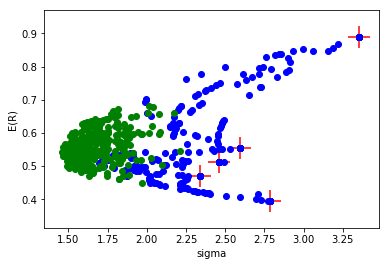

In [20]:
plt.scatter(df_sort['stddaily'].iloc[:5],df_sort['avgdaily'].iloc[:5],color='r',marker='+',s=500)

plt.xlabel('sigma')
plt.ylabel('E(R)')

plt.scatter(result_list[:250,0],result_list[:250,1],color='b')
plt.scatter(result_list[250:,0],result_list[250:,1],color='g')


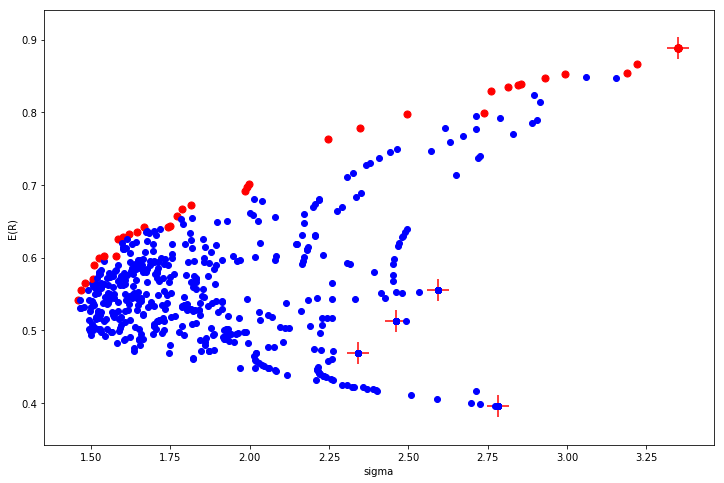

In [21]:
plt.figure(figsize=(12,8))

plt.scatter(df_sort['stddaily'].iloc[:5],df_sort['avgdaily'].iloc[:5],color='r',marker='+',s=500)

plt.xlabel('sigma')
plt.ylabel('E(R)')

for i in range(len(result_list)):
    if sum(((result_list[:,0]<result_list[i,0])&(result_list[:,1]>result_list[i,1])))==0:
        plt.scatter(result_list[i,0],result_list[i,1],color='r',s=50)
    else:
        plt.scatter(result_list[i,0],result_list[i,1],color='b')

In [22]:
def find_mvp(cMat,df_s):
    port_list=np.zeros((25,2),dtype=int)
    result_list=np.zeros((300,2))
    result_weight=np.zeros((300,5))
    c=0

    for i in [0,1,2,3,4]:
        for j in [0,1,2,3,4]:
            port_list[i*5+j,0]=i
            port_list[i*5+j,1]=j

    nn=5
    aa=np.random.uniform(0,1,[300,nn])
    bb=np.sum(aa,axis=1)
    cc=np.zeros((300,nn))

    for i in range(300):
        cc[i,:]=aa[i,:]/bb[i]
        result_list[c,0]=np.sqrt(sum(np.array(cMat.iloc[:nn,:nn])*np.array(cc[i,:])
                                     *(np.array(cc[i,:]).reshape(-1,1))))
        result_list[c,1]=np.sum(np.array(df_s['avgdaily'].iloc[:nn])*cc[i,:])
        result_weight[c,:]=cc[i,:]
        c+=1



    ## Find MVP ###############################################
    index_mvp = np.argmin(result_list[:,0])
    return result_weight[index_mvp]


In [23]:
RESULT=np.zeros((len(balanceMat),2))
KOSPI200_index=pd.read_csv('KOSPI200_index.csv').set_index('Date')
KOSPI200_close=pd.read_csv('KOSPI200_close.csv').set_index('Date')
KOSPI200_volume=pd.read_csv('KOSPI200_volume.csv').set_index('Date')
df_port_info=pd.read_csv('codenamelist.csv',encoding='cp949',dtype=str)
df_pf=pd.DataFrame()
del df_port_info['Unnamed: 0']

## GLOBAL VARIABLE#########################################
target_n=240                  # 약 1년치 데이터(한달:20일로 가정)
initial_balance=100000000     # 초기 잔고 1억
balance=initial_balance
rperiod=20                    # rebalancing period
nperiod=int(120/rperiod)      # rebalncing 횟수
residual=0                    # 잔여 현금
balanceMat=np.zeros(target_n) # 포트폴리오의 가치 시계열
###########################################################

for i in range(nperiod):
    ##### 종목 선정 #################################################
    cur=120+rperiod*i
    st=np.array(KOSPI200_close.iloc[cur-120],dtype=int)
    en=np.array(KOSPI200_close.iloc[cur-1],dtype=int)
    rt=pd.DataFrame([x/y for x,y in zip(en,st)])
    df_port_info['return_period'+str(i)]=rt
    df_sort=df_port_info.sort_values(by=['return_period'+str(i)],ascending=False)
    top_N=5
    port_list=list(df_sort.iloc[:top_N,0])
    ################################################################
    
    ##### 자산 배분 #################################################
    pfMat=np.zeros(top_N)    
    for j,jj in enumerate(port_list):
        pfMat[j]=floor((balance/top_N)/int(KOSPI200_close[jj][cur]))
        balanceMat[cur:cur+rperiod]+=np.array(KOSPI200_close[jj][cur:cur+rperiod],dtype=int)*pfMat[j]

    residual=balance-balanceMat[cur]
    balance=balanceMat[cur+rperiod-1]+residual
    
    df_pf['Code_period'+str(i)]=list(df_sort['Code'].iloc[:top_N])
    df_pf['Name_period'+str(i)]=list(df_sort['Name'].iloc[:top_N])
    df_pf['return_period'+str(i)]=list(df_sort['return_period'+str(i)].iloc[:top_N])
    df_pf['volume_period'+str(i)]=pfMat
    ################################################################

RESULT[:,0]=balanceMat

In [24]:
df_pf

,Code_period0,Name_period0,return_period0,volume_period0,Code_period1,Name_period1,return_period1,volume_period1,Code_period2,Name_period2,...,return_period3,volume_period3,Code_period4,Name_period4,return_period4,volume_period4,Code_period5,Name_period5,return_period5,volume_period5
0,020150,일진머티리얼즈,2.687719,525.0,020150,일진머티리얼즈,2.604027,518.0,020150,일진머티리얼즈,...,2.075067,54.0,115390,락앤락,2.129371,756.0,009420,한올바이오파마,2.202479,823.0
1,010620,현대미포조선,1.858108,184.0,093370,후성,1.646154,1864.0,207940,삼성바이오로직스,...,1.679104,138.0,020150,일진머티리얼즈,1.621076,587.0,010060,OCI,1.909920,138.0
2,207940,삼성바이오로직스,1.775316,72.0,207940,삼성바이오로직스,1.611111,70.0,000660,SK하이닉스,...,1.663342,553.0,008770,호텔신라,1.506944,256.0,069620,대웅제약,1.882966,138.0
3,009150,삼성전기,1.690090,207.0,009150,삼성전기,1.593248,200.0,035720,카카오,...,1.496403,256.0,004000,롯데정밀화학,1.448360,358.0,115390,락앤락,1.848148,914.0
4,011070,LG이노텍,1.528571,123.0,035720,카카오,1.502994,157.0,008930,한미사이언스,...,1.493007,990.0,207940,삼성바이오로직스,1.406122,65.0,004000,롯데정밀화학,1.770370,333.0


In [25]:
KOSPI200_index=pd.read_csv('KOSPI200_index.csv').set_index('Date')
KOSPI200_close=pd.read_csv('KOSPI200_close.csv').set_index('Date')
KOSPI200_volume=pd.read_csv('KOSPI200_volume.csv').set_index('Date')
df_port2_info=pd.read_csv('codenamelist.csv',encoding='cp949',dtype=str)
df_pf2=pd.DataFrame()
del df_port2_info['Unnamed: 0']

## GLOBAL VARIABLE#########################################
target_n=240                  # 약 1년치 데이터(한달:20일로 가정)
initial_balance=100000000     # 초기 잔고 1억
balance=initial_balance
rperiod=20                    # rebalancing period
nperiod=int(120/rperiod)      # rebalncing 횟수
residual=0                    # 잔여 현금
balanceMat=np.zeros(target_n) # 포트폴리오의 가치 시계열
###########################################################
for i in range(nperiod):
    ##### 종목 선정 #################################################
    cur=120+rperiod*i
    
    temp_df=KOSPI200_close.copy()
    temp_diff=temp_df/temp_df.shift(1)
    df_port2_info=pd.read_csv('codenamelist.csv',encoding='cp949',dtype=str)

    df_port2_info['avgdaily']=[(x-1)*100 for x in temp_diff.iloc[cur-119:cur].mean().tolist()]
    df_port2_info['stddaily']=[x*100 for x in temp_diff.iloc[cur-119:cur].std().tolist()]
    del df_port2_info['Unnamed: 0']

    df_sort2=df_port2_info.sort_values(by=['avgdaily'],ascending=False)

    port_list=df_sort2['Code'].iloc[:5].tolist()
    
    covMat=temp_diff.iloc[cur-119:cur].cov().loc[port_list,port_list]*10000
    
    top_N=5
    port_list=list(df_sort2.iloc[:top_N,0])
    idx=find_mvp(covMat,df_sort2)
    ################################################################
    
    ##### 자산 배분 #################################################
    pfMat=np.zeros(top_N)    
    for j,jj in enumerate(port_list):
        pfMat[j]=floor((balance*idx[j])/int(KOSPI200_close[jj][cur]))
        balanceMat[cur:cur+rperiod]+=np.array(KOSPI200_close[jj][cur:cur+rperiod],dtype=int)*pfMat[j]

    residual=balance-balanceMat[cur]
    balance=balanceMat[cur+rperiod-1]+residual
    
    df_pf2['Code_period'+str(i)]=list(df_sort2['Code'].iloc[:top_N])
    df_pf2['Name_period'+str(i)]=list(df_sort2['Name'].iloc[:top_N])
    df_pf2['return_period'+str(i)]=list(df_sort2['avgdaily'].iloc[:top_N])
    df_pf2['volume_period'+str(i)]=pfMat
    ################################################################

RESULT[:,1]=balanceMat
df_pf2

,Code_period0,Name_period0,return_period0,volume_period0,Code_period1,Name_period1,return_period1,volume_period1,Code_period2,Name_period2,...,return_period3,volume_period3,Code_period4,Name_period4,return_period4,volume_period4,Code_period5,Name_period5,return_period5,volume_period5
0,020150,일진머티리얼즈,0.887945,257.0,020150,일진머티리얼즈,0.869738,192.0,020150,일진머티리얼즈,...,0.652111,35.0,115390,락앤락,0.692160,745.0,009420,한올바이오파마,0.734860,463.0
1,010620,현대미포조선,0.554768,338.0,093370,후성,0.453970,1609.0,207940,삼성바이오로직스,...,0.506528,245.0,020150,일진머티리얼즈,0.494139,292.0,115390,락앤락,0.581726,709.0
2,207940,삼성바이오로직스,0.512808,96.0,207940,삼성바이오로직스,0.431230,92.0,000660,SK하이닉스,...,0.460951,146.0,008770,호텔신라,0.375953,362.0,010060,OCI,0.577400,220.0
3,009150,삼성전기,0.469068,192.0,009150,삼성전기,0.419428,210.0,035720,카카오,...,0.385364,1375.0,004000,롯데정밀화학,0.346589,382.0,069620,대웅제약,0.576131,128.0
4,011070,LG이노텍,0.395240,49.0,008930,한미사이언스,0.370980,286.0,008930,한미사이언스,...,0.364486,337.0,207940,삼성바이오로직스,0.322135,72.0,004000,롯데정밀화학,0.522852,410.0


In [281]:
logicRESULT=pd.DataFrame(np.zeros((2,6)),columns=['ret_1m','ret_1m_1Y','ret_3m','ret_3m_1Y','ret_6m','ret_6m_1Y'])
logicRESULT['Logic name']=''

In [31]:
logicRESULT.iloc[0,0]=((RESULT[120+20-1,0]/initial_balance)-1)*100
logicRESULT.iloc[0,1]=((RESULT[120+20-1,0]/initial_balance)-1)*100*12
logicRESULT.iloc[0,2]=((RESULT[120+60-1,0]/initial_balance)-1)*100
logicRESULT.iloc[0,3]=((RESULT[120+60-1,0]/initial_balance)-1)*100*4
logicRESULT.iloc[0,4]=((RESULT[120+120-1,0]/initial_balance)-1)*100
logicRESULT.iloc[0,5]=((RESULT[120+120-1,0]/initial_balance)-1)*100*2
logicRESULT['Logic name'][0]='Benchmark'
logicRESULT

logicRESULT.iloc[1,0]=((RESULT[120+20-1,1]/initial_balance)-1)*100
logicRESULT.iloc[1,1]=((RESULT[120+20-1,1]/initial_balance)-1)*100*12
logicRESULT.iloc[1,2]=((RESULT[120+60-1,1]/initial_balance)-1)*100
logicRESULT.iloc[1,3]=((RESULT[120+60-1,1]/initial_balance)-1)*100*4
logicRESULT.iloc[1,4]=((RESULT[120+120-1,1]/initial_balance)-1)*100
logicRESULT.iloc[1,5]=((RESULT[120+120-1,1]/initial_balance)-1)*100*2
logicRESULT['Logic name'][1]='MVP-rebalancing'
logicRESULT

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,ret_1m,ret_1m_1Y,ret_3m,ret_3m_1Y,ret_6m,ret_6m_1Y,Logic name
0,0.4612,5.5344,5.33595,21.3438,17.92485,35.8497,Benchmark
1,-2.7807,-33.3684,2.11420,8.4568,17.74140,35.4828,MVP-rebalancing


In [32]:
logicRESULT.set_index('Logic name')

,ret_1m,ret_1m_1Y,ret_3m,ret_3m_1Y,ret_6m,ret_6m_1Y
Logic name,,,,,,
Benchmark,0.4612,5.5344,5.33595,21.3438,17.92485,35.8497
MVP-rebalancing,-2.7807,-33.3684,2.11420,8.4568,17.74140,35.4828


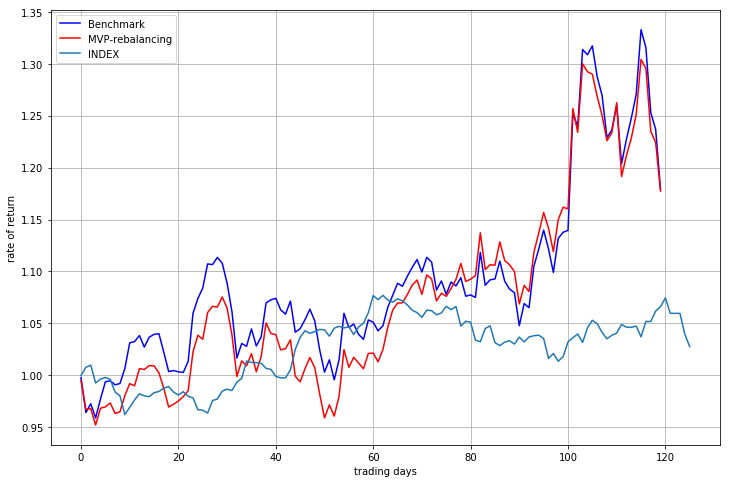

In [33]:
plt.figure(figsize=(12,8))
plt.plot(RESULT[120:,0]/initial_balance,color='b')
plt.plot(RESULT[120:,1]/initial_balance,color='r')

plt.plot(list(KOSPI200_index['Close'])[120:]/KOSPI200_index['Close'][120])
plt.grid(20)
plt.ylabel('rate of return')
plt.xlabel('trading days')
plt.legend(['Benchmark','MVP-rebalancing','INDEX'])